In [1]:
import os
import sys; sys.path.insert(0, '..')
import seaborn as sns
import numpy as np
#sys.path.insert(1, os.path.join(sys.path[0], '..'))
import df_utils
from df_utils import df_wrapper, get_timestamp_and_pose
import pandas as pd

### Innhenting av sensordata og annoteringsdata, samt definering av globale variabler 

In [2]:
train_csv_f_name = "../../data/train_data/martin_train_3_030221.csv"
train_annot_f_name = "../../data/annotation/training/martin_train_3_030221.txt"

train_csv_simon_f_name = "../../data/train_data/simon_train_3_080221.csv"
train_annot_simon_f_name = "../../data/annotation/training/simon_train_3_080221.txt"

train_csv_jonas_f_name = "../../data/train_data/jonas_train_3_080221.csv"
train_annot_jonas_f_name = "../../data/annotation/training/jonas_train_3_080221.txt"



POSE_MAP = {
    "rett": 0,
    "fram": 1,
    "fram-hoyre": 2,
    "hoyre": 3,
    "bak-hoyre": 4,
    "bak": 5,
    "bak-venstre": 6,
    "venstre": 7,
    "fram-venstre": 8
}

In [3]:
knn_train_martin = df_wrapper(train_csv_f_name)
knn_train_martin.concat_sensor_data(3)

knn_train_simon = df_wrapper(train_csv_simon_f_name)
knn_train_simon.concat_sensor_data(3)

knn_train_jonas = df_wrapper(train_csv_jonas_f_name)
knn_train_jonas.concat_sensor_data(3)


Splitting into  3  separate dataframes...
Fixing time offsets
Dropping unused columns...
Min length of sensor data:  54078
../df_utils.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_arr[i][" TimeStamp (s)"] = self.df_arr[i][" TimeStamp (s)"] - df_time_offset
Splitting into  3  separate dataframes...
Fixing time offsets
Dropping unused columns...
Min length of sensor data:  52320
../df_utils.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_arr[i][" TimeStamp (s)"] = self.df_arr[i]["

54117

[[0.0, 123.32, 0], [125.24, 243.28, 1], [245.68, 362.24, 2], [366.72, 484.88, 3], [488.24, 602.08, 4], [605.2, 724.68, 5], [727.72, 842.28, 6], [846.84, 964.12, 7], [966.08, 1081.76, 8]]
Length of knn_train.df before drops: 54078
drops: 1254
length of knn_train.df after drops: 52824
52824
52824


<AxesSubplot:xlabel=' TimeStamp (s)', ylabel='Pose'>

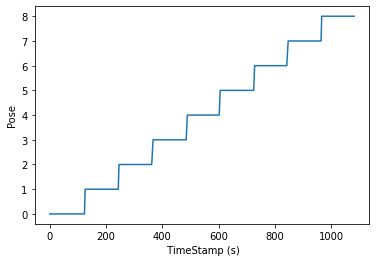

In [4]:
stamped_poses = get_timestamp_and_pose(train_annot_f_name, POSE_MAP)
print(stamped_poses)
print("Length of knn_train.df before drops: {}".format(len(knn_train_martin.df.index)))
knn_train_martin.align_poses(stamped_poses)

print(len(knn_train_martin.df.index))
# print(len(df_stamped_poses))
y_train_martin = knn_train_martin.df["Pose"]
# df['Pose'].hist(bins=4)
sns.lineplot(data=knn_train_martin.df, x=" TimeStamp (s)", y='Pose')
#sns.histplot(data=knn_train_martin.df['SensorId'])

[[0.0, 129.84, 0], [130.88, 249.28, 1], [252.16, 370.48, 2], [372.96, 489.2, 3], [490.84, 610.68, 4], [612.84, 729.8, 5], [732.44, 849.36, 6], [851.12, 969.48, 7], [971.64, 1090.36, 8]]
Length of knn_train.df before drops: 52320
drops: 830
length of knn_train.df after drops: 51490
51490
51490


<AxesSubplot:xlabel=' TimeStamp (s)', ylabel='Pose'>

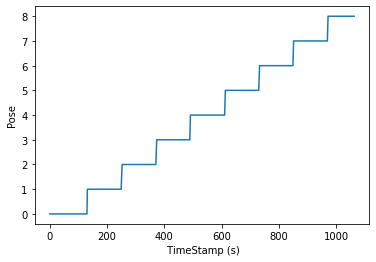

In [5]:
stamped_poses_simon = get_timestamp_and_pose(train_annot_simon_f_name, POSE_MAP)
print(stamped_poses_simon)
print("Length of knn_train.df before drops: {}".format(len(knn_train_simon.df.index)))
knn_train_simon.align_poses(stamped_poses_simon)

print(len(knn_train_simon.df.index))
# print(len(df_stamped_poses))
y_train_simon = knn_train_simon.df["Pose"]
# df['Pose'].hist(bins=4)
sns.lineplot(data=knn_train_simon.df, x=" TimeStamp (s)", y='Pose')
#sns.histplot(data=knn_train_martin.df['SensorId'])

[[0.0, 118.24, 0], [121.96, 238.2, 1], [243.16, 365.04, 2], [371.96, 487.6, 3], [489.04, 609.44, 4], [615.56, 738.24, 5], [748.76, 863.0, 6], [866.36, 987.76, 7], [992.84, 1117.76, 8]]
Length of knn_train.df before drops: 54117
drops: 2098
length of knn_train.df after drops: 52019
52019
52019


<AxesSubplot:xlabel=' TimeStamp (s)', ylabel='Pose'>

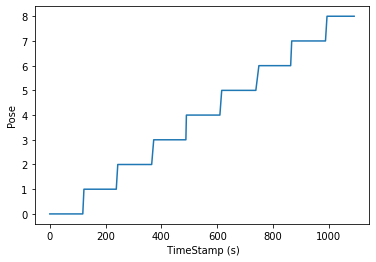

In [6]:
stamped_poses_jonas = get_timestamp_and_pose(train_annot_jonas_f_name, POSE_MAP)
print(stamped_poses_jonas)
print("Length of knn_train.df before drops: {}".format(len(knn_train_jonas.df.index)))
knn_train_jonas.align_poses(stamped_poses_jonas)

print(len(knn_train_jonas.df.index))
# print(len(df_stamped_poses))
y_train_jonas = knn_train_jonas.df["Pose"]
# df['Pose'].hist(bins=4)
sns.lineplot(data=knn_train_jonas.df, x=" TimeStamp (s)", y='Pose')
#sns.histplot(data=knn_train_martin.df['SensorId'])

In [7]:
df_train_martin = knn_train_martin.df
df_train_simon = knn_train_simon.df
df_train_jonas = knn_train_jonas.df

y_train = y_train_martin.append(y_train_simon)
y_train = y_train.append(y_train_jonas)

df_train = pd.concat([df_train_martin,df_train_simon,df_train_jonas])
df_train

,TimeStamp (s),AccX (g),AccY (g),AccZ (g),GyroX (deg/s),GyroY (deg/s),GyroZ (deg/s),MagX (uT),MagY (uT),MagZ (uT),...,MagY (uT),MagZ (uT),EulerX (deg),EulerY (deg),EulerZ (deg),QuatW,QuatX,QuatY,QuatZ,Pose
0,0.0000,0.019920,-0.794387,-0.601370,-1.562904,-1.464186,-0.498630,-10.045666,-28.373941,-27.243652,...,-20.748009,-36.988220,41.428467,9.834142,-69.666298,0.747616,-0.335055,0.135482,0.557184,0
1,0.0200,0.015635,-0.798804,-0.605099,-1.746947,-0.781661,-0.552266,-10.487769,-28.711199,-27.876856,...,-20.920061,-37.734138,41.424286,9.828160,-69.678291,0.747584,-0.334987,0.135538,0.557254,0
2,0.0400,0.015153,-0.801027,-0.604974,-0.723603,0.261424,-0.555029,-10.635139,-28.458256,-26.610451,...,-20.461252,-36.868870,41.403576,9.871590,-69.696747,0.747453,-0.335022,0.135195,0.557491,0
3,0.0600,0.020163,-0.797502,-0.608591,-0.445173,0.111246,-0.923887,-10.605668,-28.289625,-27.394417,...,-20.432577,-36.809200,41.417000,9.883158,-69.709579,0.747324,-0.335146,0.135219,0.557584,0
4,0.0800,0.026463,-0.787940,-0.609870,-0.919388,-0.897010,-0.986847,-10.664613,-29.441923,-27.243652,...,-20.260525,-37.077728,41.419933,9.901683,-69.730927,0.747169,-0.335222,0.135169,0.557759,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54112,1090.4000,-0.532361,-0.387199,-0.737558,0.239682,0.415916,-0.128227,-25.431023,0.995585,-39.214184,...,-2.366987,-38.420380,30.692022,-24.531794,-36.857323,0.911781,-0.180579,0.276119,0.244552,8
54113,1090.4200,-0.531845,-0.388514,-0.733785,0.302097,0.008098,-0.169589,-25.224703,0.433488,-39.304649,...,-2.223610,-38.330872,30.757931,-24.483858,-36.897896,0.911637,-0.181152,0.275957,0.244846,8
54114,1090.4399,-0.530322,-0.389299,-0.733020,-0.327502,0.391093,0.706819,-25.047863,-0.887435,-39.666473,...,-2.825796,-38.271194,30.819136,-24.450815,-36.930458,0.911502,-0.181662,0.275887,0.245047,8
54115,1090.4600,-0.527906,-0.386170,-0.732815,0.054942,-0.229800,0.140417,-25.136284,0.967479,-39.666473,...,-2.625067,-38.838089,30.871389,-24.417864,-36.962009,0.911384,-0.182103,0.275797,0.245262,8


In [8]:
test_csv_f_name = "../../data/test_data/elise_test_3_090221.csv"
test_annot_f_name = "../../data/annotation/testing/elise_test_3_090221.txt"

knn_test = df_wrapper(test_csv_f_name)
knn_test.concat_sensor_data(3)
knn_test.df

Splitting into  3  separate dataframes...
Fixing time offsets
Dropping unused columns...
Min length of sensor data:  9929
../df_utils.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_arr[i][" TimeStamp (s)"] = self.df_arr[i][" TimeStamp (s)"] - df_time_offset


,TimeStamp (s),AccX (g),AccY (g),AccZ (g),GyroX (deg/s),GyroY (deg/s),GyroZ (deg/s),MagX (uT),MagY (uT),MagZ (uT),...,MagX (uT),MagY (uT),MagZ (uT),EulerX (deg),EulerY (deg),EulerZ (deg),QuatW,QuatX,QuatY,QuatZ
0,0.00,0.051543,-0.316243,-0.948717,-1.002070,-0.066691,0.565001,-5.948811,-23.483709,-33.545547,...,-2.589375,-28.174973,-32.930431,24.547493,13.802674,-112.809402,0.515482,-0.214576,0.110824,0.822164
1,0.02,0.055316,-0.324364,-0.949392,-1.015423,0.251284,0.797785,-6.420393,-24.326853,-33.394783,...,-1.771971,-27.859543,-32.542553,24.549791,13.797469,-112.813591,0.515458,-0.214546,0.110873,0.822180
2,0.04,0.046563,-0.309953,-0.948379,-1.592512,-0.805988,1.865956,-6.361444,-23.680443,-33.816925,...,-1.801163,-27.486759,-32.691738,24.572947,13.806880,-112.817360,0.515368,-0.214712,0.111001,0.822176
3,0.06,0.053399,-0.305396,-0.950793,-0.803217,0.196990,-0.072227,-6.390918,-23.568024,-33.424942,...,-2.355830,-28.576429,-32.781246,24.572929,13.811389,-112.823654,0.515313,-0.214737,0.110990,0.822205
4,0.08,0.057278,-0.310856,-0.952729,-1.064726,0.341457,-0.362866,-5.447759,-23.736652,-33.575703,...,-1.859550,-27.630136,-32.602230,24.591740,13.818795,-112.833969,0.515188,-0.214863,0.111109,0.822235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9924,198.48,0.320423,-0.295448,-0.933876,9.459810,1.033852,1.886418,5.074378,-26.209871,-32.761581,...,9.905233,-32.074844,-26.903429,30.052856,26.289711,-123.484032,0.393340,-0.312993,0.118397,0.856330
9925,198.50,0.359058,-0.335154,-0.945946,8.094769,-5.586331,9.871339,5.516485,-26.181768,-33.424942,...,9.817654,-32.677032,-26.992937,30.177822,26.294823,-123.349503,0.393988,-0.313597,0.118941,0.855736
9926,198.52,0.283735,-0.266167,-0.937164,14.896440,-1.735162,6.355691,5.015429,-26.153664,-32.821888,...,9.817654,-31.960144,-26.784079,30.387638,26.292835,-123.164803,0.394797,-0.314498,0.120009,0.854882
9927,198.54,0.330034,-0.298543,-0.943025,16.260464,-3.933465,4.644106,5.310167,-26.237978,-32.550510,...,9.759268,-32.103519,-26.127670,30.688082,26.275589,-122.915741,0.395878,-0.315677,0.121640,0.853717


[[0.0, 20.68, 1], [22.2, 43.52, 7], [45.16, 65.36, 5], [67.56, 87.4, 3], [88.88, 107.28, 0], [110.0, 129.44, 8], [132.12, 153.04, 6], [155.36, 174.16, 4], [176.8, 197.76, 2]]
drops: 892
length of knn_train.df after drops: 9037
9037


<AxesSubplot:xlabel=' TimeStamp (s)', ylabel='Pose'>

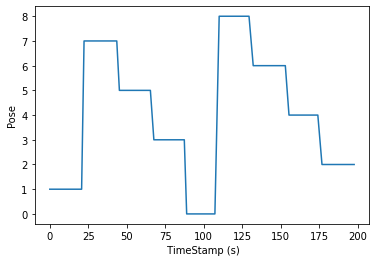

In [9]:
test_poses = get_timestamp_and_pose(test_annot_f_name, POSE_MAP)

print(test_poses)
knn_test.align_poses(test_poses)

y_test = knn_test.df["Pose"]  # df_test["Pose"]

sns.lineplot(data=knn_test.df, x=" TimeStamp (s)", y='Pose')

In [10]:
x_train = df_train.drop([' TimeStamp (s)', 'Pose'],axis=1)
x_test = knn_test.df.drop([' TimeStamp (s)', 'Pose'], axis=1) 


print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(156333, 48)
(156333,)
(9037, 48)


In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#n_estimators_lst = [i for i in range(1, 200)]
#parameters = {'n_estimators':n_estimators_lst} 
#rfc = RandomForestClassifier(random_state=69)
#clf = GridSearchCV(rfc, parameters, n_jobs=-1)
#clf.fit(x_train, y_train)

n_estimators = 100;
ovre_grense = 102;
accuracy_arr = []
for(i in range(1)):
    pipe = make_pipeline(RandomForestClassifier(n_estimators=160, random_state=69))
    pipe.fit(x_train,y_train)
    predictions = pipe.predict(x_test)

    number_of_corrects = 0
    for num in range(len(predictions)):
        if(predictions[num] == y_test.iloc[num]):
            number_of_corrects += 1

        print("number of correct: {}".format(number_of_corrects))
        print("number of guesses: {}".format(len(predictions)))
        print("% correct: {}".format(number_of_corrects / len(predictions) * 100))
    accuracy_arr.append((number_of_corrects / len(predictions) * 100))


print("Høyeste accuracy: {}".format(accuracy_arr[accuracy_arr.argmax()])



#pipe = make_pipeline(KNeighborsClassifier(n_neighbors=10))
#pipe.fit(x_train, y_train)
#predictions = pipe.predict(x_test)

#rfc.fit(x_train,y_train)
#predictions = clf.predict(x_test)

#mlp = MLPClassifier(activation='relu', random_state=69)
#mlp.fit(x_train,y_train)
#predictions = mlp.predict(x_test)


SyntaxError: invalid syntax (<ipython-input-27-c3a1777ada8f>, line 21)

<AxesSubplot:xlabel='x', ylabel='y'>

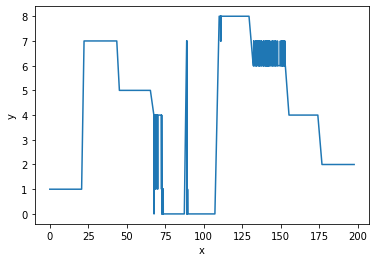

In [23]:
df_predict = pd.DataFrame({'x': knn_test.df[' TimeStamp (s)'],'y':predictions})
sns.lineplot(data=df_predict,x='x',y='y')

[[ 907    8    0    0    0    0    0    6    0]
 [   0 1035    0    0    0    0    0    0    0]
 [   0    0 1049    0    0    0    0    0    0]
 [ 716   37    0   36  204    0    0    0    0]
 [   0    0    0    0  941    0    0    0    0]
 [   0    0    0    0    0 1011    0    0    0]
 [   0    0    0    0    0    0  922  125    0]
 [   0    0    0    0    0    0    0 1067    0]
 [   0    0    0    0    0    0    0    7  966]]
              precision    recall  f1-score   support

           0       0.56      0.98      0.71       921
           1       0.96      1.00      0.98      1035
           2       1.00      1.00      1.00      1049
           3       1.00      0.04      0.07       993
           4       0.82      1.00      0.90       941
           5       1.00      1.00      1.00      1011
           6       1.00      0.88      0.94      1047
           7       0.89      1.00      0.94      1067
           8       1.00      0.99      1.00       973

    accuracy             

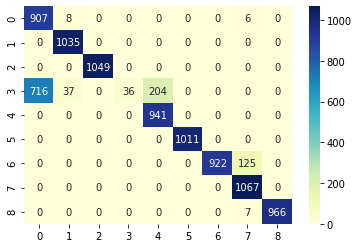

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions, zero_division=True))

sns.heatmap(confusion_matrix(y_test, predictions),
            cmap="YlGnBu", annot=True, fmt="d")

number_of_corrects = 0
for num in range(len(predictions)):
    if(predictions[num] == y_test.iloc[num]):
        number_of_corrects += 1

print("number of correct: {}".format(number_of_corrects))
print("number of guesses: {}".format(len(predictions)))
print("% correct: {}".format(number_of_corrects / len(predictions) * 100))

In [18]:
number_of_corrects = 0
for num in range(len(predictions)):
    if(predictions[num] == y_test.iloc[num]):
        number_of_corrects += 1


print("number of correct: {}".format(number_of_corrects))
print("number of guesses: {}".format(len(predictions)))
print("% correct: {}".format(number_of_corrects/len(predictions)*100))

number of correct: 6959
number of guesses: 9037
% correct: 77.0056434657519


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=59d486bc-e14d-4632-9064-12272fc72d11' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>